In [1]:
import numpy as np
from tensorized_dp import TensorDP
from envs.gridworld import GridworldEnv

import pandas as pd
import matplotlib.pyplot as plt

from utils.grid_visualization import visualize_value_function

## `GridWorld` 초기화하기

가로로 `nx` 개, 세로로 `ny` 개의 칸을 가진 `GridworldEnv`를 만듭니다!

In [2]:
nx = 5
ny = 5
env = GridworldEnv([nx,ny])

## 동적계획법 '에이전트' 초기화하기

동적 게획법은 원래 `에이전트`라는 개념을 사용하지 않지만, 일반적으로 사용되는 강화학습의 구현 템플릿에 대한 이해를 돕기 위해 `에이전트`라는 개념을 적용하였습니다.

In [3]:
dp_agent = TensorDP()
dp_agent.set_env(env)

Tensor DP agent initialized
Environment spec:  Num. state = 25 | Num. actions = 4 


## 정책 반복실습

정책반복 = (정책 평가 + 정책 개선) 을 수렴할때까지 반복!

```python
def policy_iteration(self, policy=None):
    if policy is None:
        pi_old = self.policy
    else:
        pi_old = policy

    info = dict()
    info['v'] = list()
    info['pi'] = list()
    info['converge'] = None

    steps = 0
    converged = False
    while True:
        v_old = self.policy_evaluation(pi_old)
        pi_improved = self.policy_improvement(pi_old, v_old)
        steps += 1

        info['v'].append(v_old)
        info['pi'].append(pi_old)

        # check convergence
        policy_gap = np.linalg.norm(pi_improved - pi_old)

        if policy_gap <= self.error_tol:
            if not converged:  # record the first moment of within error tolerance.
                info['converge'] = steps
            break
        else:
            pi_old = pi_improved
    return info
```

In [4]:
%%time
dp_agent.reset_policy()
info_pi = dp_agent.policy_iteration()

Wall time: 6 ms


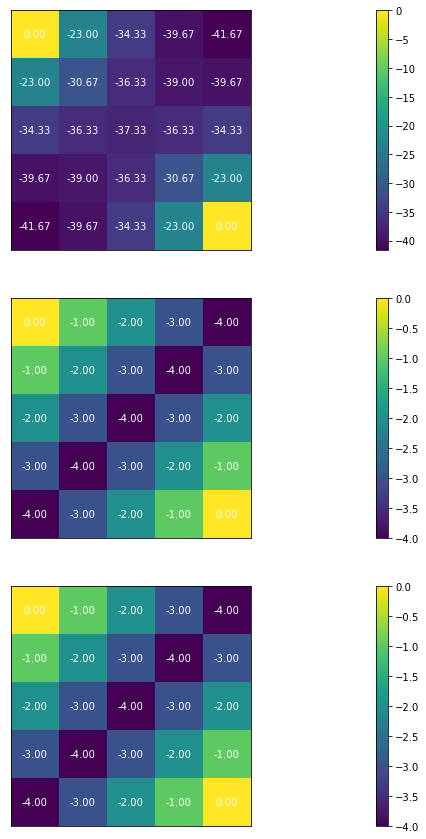

In [5]:
figsize_mul = 15
steps = info_pi['converge']

fig, ax = plt.subplots(steps,1, figsize=(steps*figsize_mul, 
                                         figsize_mul))
for i in range(steps):
    visualize_value_function(ax[i],info_pi['v'][i], nx, ny)

## 가치 반복 실습

```python
def value_iteration(self, v_init=None, compute_pi=False):
"""
:param v_init: (np.array) initial value 'guesstimation' (optional)
:param compute_pi: (bool) compute policy during VI
:return: v_opt: the optimal value function
"""

if v_init is not None:
    v_old = v_init
else:
    v_old = np.zeros(self.ns)

info = dict()
info['v'] = list()
info['pi'] = list()
info['converge'] = None

steps = 0
converged = False

while True:
    # Bellman optimality backup
    v_improved = (self.R.T + self.P.dot(v_old)).max(axis=0)
    info['v'].append(v_improved)

    if compute_pi:
        # compute policy from v
        # 1) Compute v -> q
        q_pi = (self.R.T + self.P.dot(v_improved))

        # 2) Construct greedy policy
        pi = np.zeros_like(self.policy)
        pi[np.arange(q_pi.shape[1]), q_pi.argmax(axis=0)] = 1
        info['pi'].append(pi)

    steps += 1

    # check convergence
    policy_gap = np.linalg.norm(v_improved - v_old)

    if policy_gap <= self.error_tol:
        if not converged:  # record the first moment of within error tolerance.
            info['converge'] = steps
        break
    else:
        v_old = v_improved
return info
```

In [6]:
%%time
dp_agent.reset_policy()
info_vi = dp_agent.value_iteration()

Wall time: 995 µs


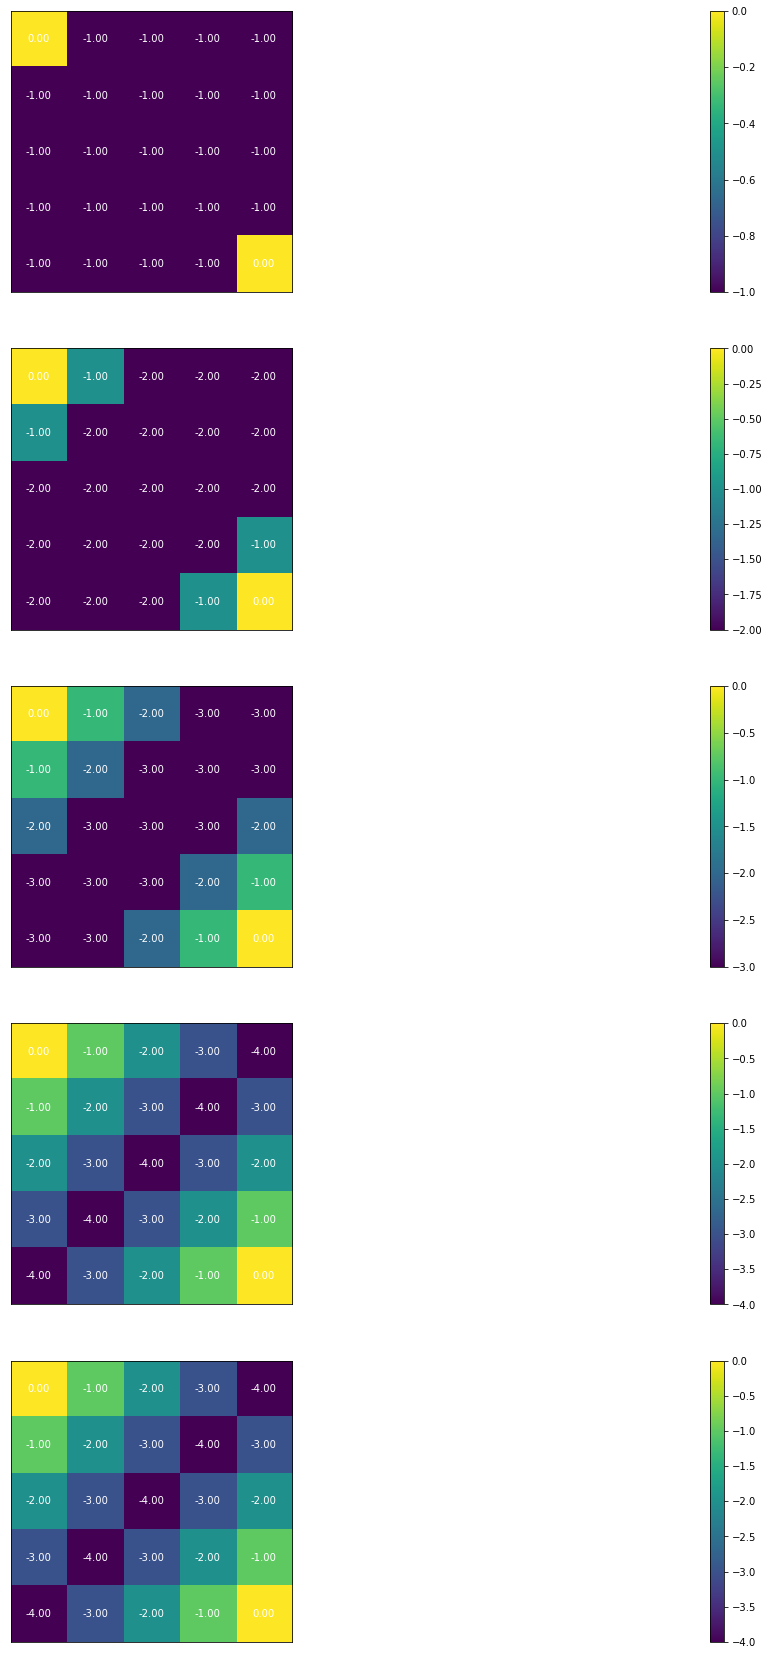

In [7]:
figsize_mul = 30
steps = info_vi['converge']

fig, ax = plt.subplots(steps,1, figsize=(steps*figsize_mul, 
                                         figsize_mul))
for i in range(steps):
    visualize_value_function(ax[i],info_vi['v'][i], nx, ny)